In [17]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random
from category_encoders import LeaveOneOutEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone') 
print(os.getcwd())

/Users/liuyang/Desktop/Springboard_Capstone/notebooks
/Users/liuyang/Desktop/Springboard_Capstone


In [3]:
df = pd.read_csv('data/preprocessed_train.csv')

In [4]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_149,0.689,1,1,0,2,1,1,2,4,1,106,0
1,city_83,0.923,1,1,0,2,1,3,1,2,1,69,0
2,city_16,0.910,1,1,0,2,1,2,1,1,1,4,0
3,city_64,0.666,1,1,0,2,1,3,1,4,1,26,0
4,city_100,0.887,1,0,0,2,1,2,1,4,1,88,1


In [5]:
df.shape

(18359, 13)

In [6]:
X = df.drop(['target'],axis=1)
y = df['target']

In [7]:
enc = LeaveOneOutEncoder(cols=['city'])

In [8]:
X_enc = enc.fit_transform(X,y)

In [9]:
X_enc.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.125000,0.689,1,1,0,2,1,1,2,4,1,106
1,0.099291,0.923,1,1,0,2,1,3,1,2,1,69
2,0.093164,0.910,1,1,0,2,1,2,1,1,1,4
3,0.101695,0.666,1,1,0,2,1,3,1,4,1,26
4,0.159259,0.887,1,0,0,2,1,2,1,4,1,88


In [10]:
X_scaled = StandardScaler().fit_transform(X_enc)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=3)

In [12]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
metrics.confusion_matrix(y_test, y_pred,labels=[1,0])

array([[   0,  695],
       [   0, 4813]])

In [15]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

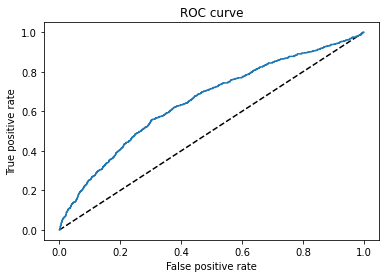

In [16]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [19]:
os = SMOTE(random_state=0)
#columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
# os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
# os_data_y= pd.DataFrame(data=os_data_y,columns=['target'])

In [24]:
print(os_data_X.shape)
print(os_data_y.shape)

(22242, 12)
(22242,)


In [27]:
os_data_y.value_counts()

1    11121
0    11121
Name: target, dtype: int64

In [29]:
X_os_train, X_os_test, y_os_train, y_os_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
logreg2 = LogisticRegression()
logreg2.fit(X_os_train, y_os_train)

LogisticRegression()

In [36]:
y_os_pred2=logreg2.predict(X_os_test)
metrics.confusion_matrix(y_os_test, y_os_pred,labels=[1,0])

array([[1741, 1600],
       [1005, 2327]])

In [33]:
y_os_pred_proba = logreg2.predict_proba(X_os_test)[:,1]
fpr, tpr, _ = roc_curve(y_os_test, y_os_pred_proba)

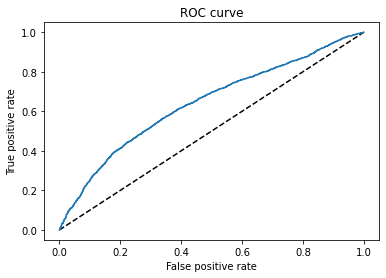

In [34]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [37]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_os_test,y_os_pred2)
print('AUC:{0:.3f}'.format(auc))

AUC:0.610


In [38]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_pred)
print('AUC:{0:.3f}'.format(auc))

AUC:0.500
